# <font color='red'>BackPropagation</font>

## <font color='red'>Loading data </font>

In [0]:
import pickle
import numpy as np
import math

import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>


*  <b><br>
    *  Forward propagation</b><font color='blue'> def forward_propagation()</b></font><br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='blue'>Forward propagation </font>

In [0]:
import math

In [0]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    sig = 1/(1+math.exp(-z))
    return sig
    
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph. 
        # you have to return the following variables
        forward_dict= dict()
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        z1 = ((w[0]*x[0]+w[1]*x[1])**2+w[5])
        part1 = math.exp(z1)
        forward_dict['exp'] = part1
        
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        z2 = part1 +w[6]
        part2 = math.tanh(z2)
        forward_dict['tanh']=part2
        
        
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        z3 =(math.sin(w[2]*x[2])*(w[3]*x[3]+w[4]*x[4]) + w[7])
        part3 = sigmoid(z3)
        forward_dict['sigmoid']= part3
        
        # now compute remaining values from computional graph and get y'
        y_dash = part3*w[8]+part2
        
        # write code to compute the value of L=(y-y')^2
        Loss = (y-y_dash)**2
        forward_dict['loss'] = Loss
        
        # compute derivative of L  w.r.to Y' and store it in dl
        dl = -2*(y-y_dash)
        forward_dict['dl'] = dl
        
        # Create a dictionary to store all the intermediate values
        
        
        # store L, exp,tanh,sig variables
        return forward_dict#(dictionary, which you might need to use for back propagation)

## <font color='blue'>Backward propagation</font>

In [0]:
def backward_propagation(x,W,dict1):
    dw  = dict()
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    dw1 = (dict1['dl'])*(1-dict1['tanh']**2)*dict1['exp']*(2*x[0]*(w[0]*x[0]+w[1]*x[1]))
    dw['dw1'] = dw1
    
    dw2 = (dict1['dl'])*(1-dict1['tanh']**2)*dict1['exp']*(2*x[1]*(w[0]*x[0]+w[1]*x[1]))
    dw['dw2'] =dw2,
    
    dw3 = (dict1['dl'])*(dict1['sigmoid']*(1-dict1['sigmoid'])) *(x[3]*w[3]+x[4]*w[4])*(math.cos(w[2]*x[2]))*x[2]*w[8]
    dw['dw3'] = dw3
    
    dw4 = (dict1['dl'])*(dict1['sigmoid']*(1-dict1['sigmoid'])) *(math.sin(w[2]*x[2]))*x[3]*w[8]
    dw['dw4'] = dw4
    
    dw5 = (dict1['dl'])*(dict1['sigmoid']*(1-dict1['sigmoid'])) *(math.sin(w[2]*x[2]))*x[4]*w[8]
    dw['dw5'] = dw5
    
    dw6 = (dict1['dl'])*(1-dict1['tanh']**2)*dict1['exp']
    dw['dw6'] =dw6
    
    dw7 = (dict1['dl'])*(1-dict1['tanh']**2)   
    dw['dw7'] = dw7
    

    

    

    
    dw8 = (dict1['dl'])*(dict1['sigmoid']*(1-dict1['sigmoid'])) * w[8]
    dw['dw8'] = dw8
    
    dw9 = (dict1['dl'])*(dict1['sigmoid'])
    dw['dw9'] = dw9
    
    
    
    return dw

## <font color='blue'>gradient checking</font>

In [0]:
def gradient_checking(x,y,W):
    
    
    # compute the L value using forward_propagation()
    
    forward = forward_propagation(x, y, W)
    
    # compute the gradients of W using backword_propagation()
    backward = backward_propagation(x,W,forward)
    grad = [j for i,j in backward.items()]
    print(grad)
    dw_approx_list= []
    check = []
    
    for i in range(9):
        w1 = W.copy()
        
        w1[i] = w1[i]+0.0001
        l_plus= forward_propagation(x, y, w1)
        w2 = W.copy()
        w2[i] = w2[i]-0.0001
        
        l_minus = forward_propagation(x, y, w2)
        
        dw_approx_list.append((l_plus['loss'] - l_minus['loss'])/(2*0.0001))
    print(dw_approx_list)
    for j in range(len(W)):
        num = np.linalg.norm(grad[j] -dw_approx_list[j])
        
        denom = np.linalg.norm(grad[j]) + np.linalg.norm(dw_approx_list[j])
        
        diff = num / denom 
        
        
        if diff <= 1e-7:
            
            check.append(True)
        else:
            
            check.append(False)
    return check

In [0]:
W = np.ones(9)*0.1
a = gradient_checking(X[0],y[0],W)
print(a)

[-0.22973323498702003, (-0.021407614717752925,), -0.005625405580266319, -0.004657941222712423, -0.0010077228498574246, -0.6334751873437471, -0.561941842854033, -0.04806288407316517, -1.0181044360187037]
[-0.22973323022201786, -0.02140761471536301, -0.0056254055608162545, -0.004657941222729889, -0.0010077228507210378, -0.6334751863795729, -0.5619418463920223, -0.0480628840343611, -1.0181044360180191]
[True, True, True, True, True, True, True, True, True]


<font color='blue'>Algorithm with Vanilla update of weights</font>

In [0]:
alpha = 0.0001
w=np.ones(9)*0.1 
loss_vanilla = []
epochs = []
for n in range(100):
    
    for i in range(X.shape[0]):
        f = forward_propagation(X[i],y[i],w)
        b = backward_propagation(X[i],w,f)
        dw = [j for i,j in b.items()]
        for w_i in range(len(w)):
            w[w_i] = w[w_i] - alpha*dw[w_i]
            

        ##w[0] -= alpha*b['dw1']
        #w[1] -= alpha*b['dw2']
        #w[2] -= alpha*b['dw3']
        #w[3] -= alpha*b['dw4']
        #w[4] -= alpha*b['dw5']
        #w[5] -= alpha*b['dw6']
        #w[6] -= alpha*b['dw7']
        #w[7] -= alpha*b['dw8']
        #w[8] -= alpha*b['dw9']
        
    loss_vanilla.append(f['loss'])
    epochs.append(n)       

<font color='blue'>Plot between epochs and loss</font>

Text(0.5, 1.0, 'epochs vs loss')

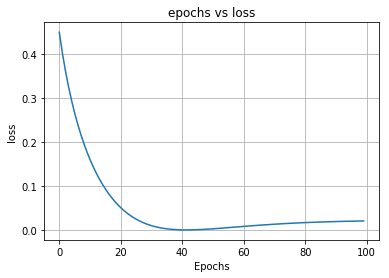

In [0]:
plt.plot(epochs,loss_vanilla)
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('epochs vs loss')

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [0]:
gamma = 0.9
alpha = 0.0001
w=np.ones(9)*0.1 
loss_momentum = []
epochs = []
f = forward_propagation(X[i],y[i],w)
b = backward_propagation(X[i],w,f)
dw = [j for i,j in b.items()]
for n in range(100):
    
    
    for i in range(X.shape[0]):
        v1 = alpha*b['dw1']
        w[0] -= v1 
        v2 = gamma*v1 + alpha*b['dw2'] 
        w[1] -= v2
        v3 = gamma*v2 + alpha*b['dw3']
        w[2] -= v3
        v4 = gamma*v3 + alpha *b['dw4']
        w[3] -= v4
        v5 = gamma*v4 + alpha*b['dw5']
        w[4] -= v5
        v6 = gamma*v5 + alpha*b['dw6']
        w[5] -= v6
        v7 = gamma*v6 + alpha * b['dw7']
        w[6] -= v7
        v8 = gamma*v7 + alpha*b['dw8']
        w[7] -= v8
        v9 = gamma*v8 + alpha*b['dw9']
        w[8] -= v9
    f = forward_propagation(X[i],y[i],w)
    b = backward_propagation(X[i],w,f)
    loss_momentum.append(f['loss'])
    epochs.append(n)

<font color='blue'>Plot between epochs and loss</font>

Text(0.5, 1.0, 'epochs vs loss')

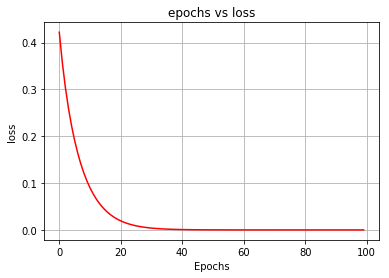

In [0]:
plt.plot(epochs,loss_momentum,c='r')

plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('epochs vs loss')

###<font color='blue'>Algorithm with Adam update of weights</font>

In [0]:
def formula(e,m,v):
    return m/(math.sqrt(v+e))

In [0]:
epsilon = (10)**(-8)
b1 = 0.9
b2 = 0.99
w=np.ones(9)*0.1 
loss_adam= []
epochs = []

m = 0
v = 0
for e in range(100):
    for i in range(X.shape[0]):
        f = forward_propagation(X[i],y[i],w)
        b = backward_propagation(X[i],w,f)
        dw = [j for i,j in b.items()]
        for w_i in range(len(w)):
            m =m*b1 + (1-b1)*dw[w_i]
            v = v*b2 + (1-b2)*(dw[w_i]**2)
            m_dash = m/(1-(b1**(e+1)))
            v_dash = v/(1-(b2**(e+1)))
            w[w_i] -= (0.001*m_dash)/(math.sqrt(v_dash+epsilon))
            

    loss_adam.append(f['loss'])
    epochs.append(e)
            



<font color='blue'>Plot between epochs and loss</font>

Text(0.5, 1.0, 'epochs vs loss')

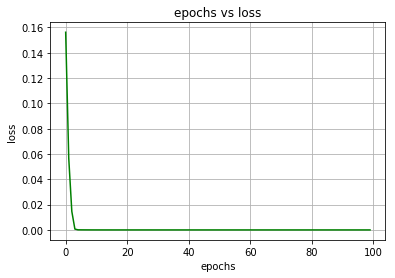

In [0]:
plt.plot(epochs,loss_adam,c='g')
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs vs loss")


<font color='blue'>Comparision plot between epochs and loss with different optimizers</font>

In [0]:
epo = [i for i in range(100)]

Text(0.5, 1.0, 'epochs vs loss')

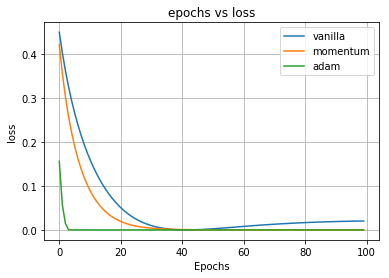

In [0]:
plt.plot(epo,loss_vanilla,label = 'vanilla')
plt.plot(epo,loss_momentum,label = 'momentum')
plt.plot(epo,loss_adam,label = 'adam')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('epochs vs loss')